## Lending club data Baseline - Exploratory analysis

### Credit Risk Prediction (LendingClub 2008–2016) 🚀

**🎯 Objective:** Build a **baseline credit risk model** to predict whether a borrower will default on a loan, using LendingClub data from 2008 to 2016.  

---

### Outline
1. **Setup & Configuration**: Load libraries, set random seed, define paths  
2. **Data Loading & Inspection**: Read in data, inspect shape and basic summaries  
3. **Data Cleaning & Preprocessing**: Handle missing values, type conversions  
4. **Exploratory Data Analysis (EDA)**: Analyze target distribution and key features  
5. **Feature Engineering**: Create and transform useful input features  
6. **Modeling — Baseline**: Train a Logistic Regression model  
7. **Evaluation**: Compute ROC‑AUC, confusion matrix, precision/recall  
8. **Results & Insights**: Summarize key findings and model behavior  
9. **Conclusion & Next Steps**: Reflect on outcomes and outline enhancements  

---

*This notebook serves as a foundation—cleaned data, baseline model, and key insights—to be extended later with improved modeling, drift validation, explainability, and productionization.*


- This dataset shows people that have taken loans and paid off/ defaulted.
- We need to take care of 2 things. 
    - If a person can repay, that is an ideal customer that we would need to capture, as that is important for the business
    - if the person would deafault on the loan, then that is not a customer that the business would not want, and we would need to avoid giving loans to such groups.

The right model would have to balance would have to balance between these true negatives and False positives to make the optimal profit for the company.

There are 396 thousand datapoints, which seems a good amount to build a model from. There are also 27 features.


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>


In [40]:
# Setup & Configuration
# =================================

# 1. Import essential libraries
import os
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve

# 2. Set global configurations
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

# 3. Plotting style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 4. Define paths and file names
DATA_DIR = "../data"
SMALL_DATA_FILE = os.path.join(DATA_DIR, "lending_club_loan_two.csv")

# 5. Function to load data
def load_small_data(file_path=SMALL_DATA_FILE):
    """
    Load the smaller LendingClub dataset (2008–2016).
    """
    try:
        df = pd.read_csv(file_path)
        print(f"Loaded data: {df.shape[0]:,} rows and {df.shape[1]} columns.")
        return df
    except FileNotFoundError:
        raise FileNotFoundError(f"Data file not found. Check the path: {file_path}")




Working with the Smaller model, to create a baseline model for our model evaluations.

Let us now import the dataset, and inspect the dataset

In [41]:
# Load the smaller LendingClub dataset
df = load_small_data()

Loaded data: 396,030 rows and 27 columns.


In [42]:
# Display the first few rows
print("\nSample data:")
display(df.head())

# Show basic info: shape, column types, non-null counts
print("\nDataFrame Info:")
print(df.info())

# Show descriptive statistics for numeric columns
print("\nNumeric summary statistics:")
display(df.describe().T)

# View distribution of the target variable
print("\nTarget ('loan_status') distribution:")
display(df['loan_status'].value_counts())



Sample data:


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-nu

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00



Target ('loan_status') distribution:


loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

There are a lot more of fully paid loans in the dataset, which is although good for the company, would be a problem when it comes to ML with Class imbalance. We would have to take care of that before we create models for prediction.

Let's clean the data, and make it ready for EDA and modeling.


In [43]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [44]:
# Part 4 – Data Cleaning & Preprocessing
# ========================================

# 1. Check missing values
print("\n Missing values per column:")
missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing > 0])


 Missing values per column:


mort_acc                37795
emp_title               22927
emp_length              18301
title                    1756
pub_rec_bankruptcies      535
revol_util                276
dtype: int64

WE would need to work on improving the quality of each of these imputations for the dataset. 

Let's investigate what the best method is for imputing each of these variables

1. mort_acc -> This is the number of morgage accounts. Seems like a median replacement would be ideal for the missing ones.

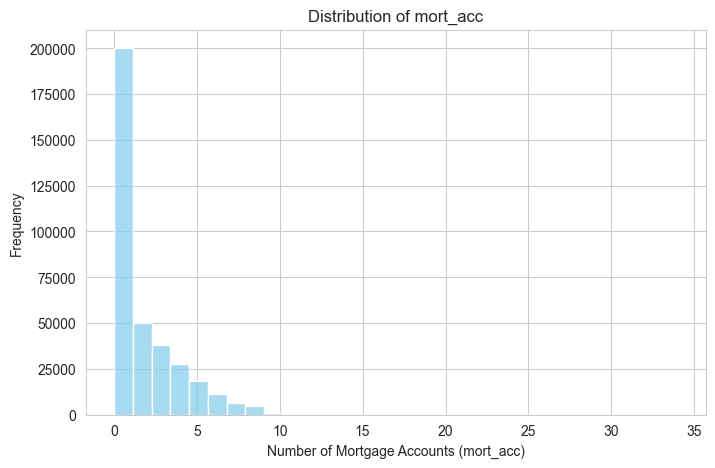

In [45]:
# Clean data
mort_values = df['mort_acc'].dropna()

plt.figure(figsize=(8, 5))
sns.histplot(mort_values, bins=30, kde=False, color='skyblue')
plt.title('Distribution of mort_acc')
plt.xlabel('Number of Mortgage Accounts (mort_acc)')
plt.ylabel('Frequency')
plt.show()

In [46]:
print('The median is '+ str(df['mort_acc'].median())+' and the mode is '+ str(df['mort_acc'].mode()))

The median is 1.0 and the mode is 0    0.0
Name: mort_acc, dtype: float64


In [47]:
df.groupby('mort_acc').count().sort_values('loan_status', ascending= False)[['loan_status']].head()

,loan_status
mort_acc,
0.0,139777
1.0,60416
2.0,49948
3.0,38049
4.0,27887


In [48]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], shape=(173106,), dtype=object)

In [49]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      shape=(48817,), dtype=object)

Employee title is vague and is a lot of categories. The best case is to either drop this, or in the future, use LLMs to categorize these into groups.

Similarly, the title column is useless as well. Both of these needs to be dropped or use LLMs or other NLP methods to make sense of.

In [50]:
## 2. Handle missing values 

# Imputing the values with median and mode
df['mort_acc'].fillna(df['mort_acc'].median(), inplace=True)
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace=True)
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median(), inplace=True)
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)

C:\Users\aadit\AppData\Local\Temp\ipykernel_28088\3157790903.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mort_acc'].fillna(df['mort_acc'].median(), inplace=True)
C:\Users\aadit\AppData\Local\Temp\ipykernel_28088\3157790903.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [51]:
# 3. Convert date columns to datetime and extract useful features
for date_col in ['issue_d', 'earliest_cr_line']:
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        print(f"Converted '{date_col}' to datetime dtype.")

Converted 'issue_d' to datetime dtype.
Converted 'earliest_cr_line' to datetime dtype.


C:\Users\aadit\AppData\Local\Temp\ipykernel_28088\1236922963.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
C:\Users\aadit\AppData\Local\Temp\ipykernel_28088\1236922963.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce')


We can create new columns to understand some of these temporal features better

These two new features are designed to capture important **time-based information** that often has a strong relationship with credit risk:

1.  `issue_year` — Loan Origination Year



* **What it represents**: The year when the borrower took out the loan.
* **Why it matters**:

  * **Economic context**: Borrowers during economic downturns (e.g., 2008 financial crisis) may carry higher risk.
  * **Feature drift and trend analysis**: Helps detect if model performance shifts over time.
  * **Enable time-based splits**: Essential for evaluating how your model generalizes to future data.



2. `credit_history_years` — Length of Credit History


* **What it measures**: The number of years since the borrower's earliest credit account (as of Dec 31, 2016).
* **Why it matters**:

  * **Indicator of credit experience**: Longer histories are often associated with better credit behavior.
  * **Risk signal**: Newer credit users tend to have less stable repayment history.
  * **Numeric use**: Easy to apply in models—no need for buckets or encodings


By adding these, we:

* Provide the model with **temporal context**—how long a person has been in credit, and when they started a particular loan.
* Help the model understand **historical trends** and adapt to changing economic conditions.
* Create an avenue for **time-based validation**, simulating real-world performance and detecting drift.



In [52]:
# Create new temporal features
df['issue_year'] = df['issue_d'].dt.year
df['credit_history_years'] = (pd.to_datetime('2016-12-31') - df['earliest_cr_line']).dt.days / 365
print("\nAdded 'issue_year' and 'credit_history_years' features.")


Added 'issue_year' and 'credit_history_years' features.


In [53]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [54]:
# 4. Simplifying target column: binary encode loan_status (default vs fully paid)
df['default_flag'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})
print(df['default_flag'].value_counts())


default_flag
0    318357
1     77673
Name: count, dtype: int64


| Column                                             | Why We Drop It                                                                                                                                 |
| -------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| **`loan_status`**                                  | We already converted this into our binary label (`default_flag`). Keeping it could cause data leakage or confusion.                            |
| **`issue_d`** (Loan Issue Date)                    | We derived `issue_year` from this. Keeping the raw date is unnecessary and may complicate modeling.                                            |
| **`earliest_cr_line`** (Earliest Credit Line Date) | We transformed this into a numeric feature (`credit_history_years`); the raw date isn't needed anymore.                                        |
| **`emp_title`** (Employment Title)                 | It's a free-text field with too many unique values—noisy and low signal. We'd need complex NLP to use it, so we drop it.                       |
| **`title`** (Loan Title)                           | Also free-text with inconsistent formatting. Adds little predictive value and would bloat the feature set.                                     |



In [55]:
# 5. Drop unused columns
unused_cols = ['loan_status', 'issue_d', 'earliest_cr_line', 'emp_title', 'title']
df = df.drop(columns=[c for c in unused_cols if c in df.columns])
print("\nDropped unnecessary columns:", unused_cols)

# Final data shape
print(f"\n Preprocessing complete — dataset now has {df.shape[0]:,} rows and {df.shape[1]} columns.")


Dropped unnecessary columns: ['loan_status', 'issue_d', 'earliest_cr_line', 'emp_title', 'title']

 Preprocessing complete — dataset now has 396,030 rows and 25 columns.


## Exploratory data analysis

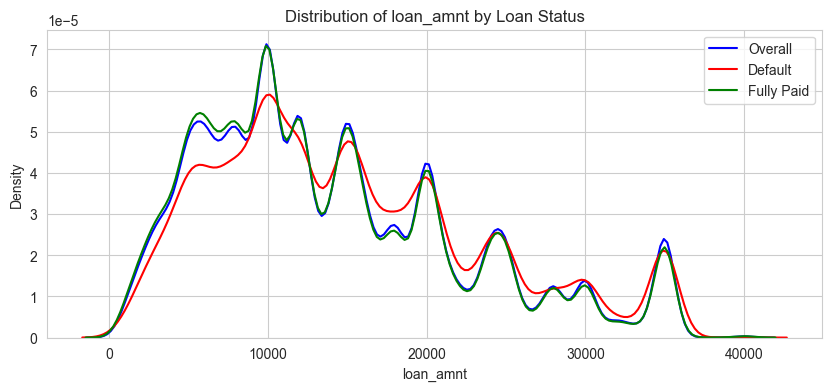

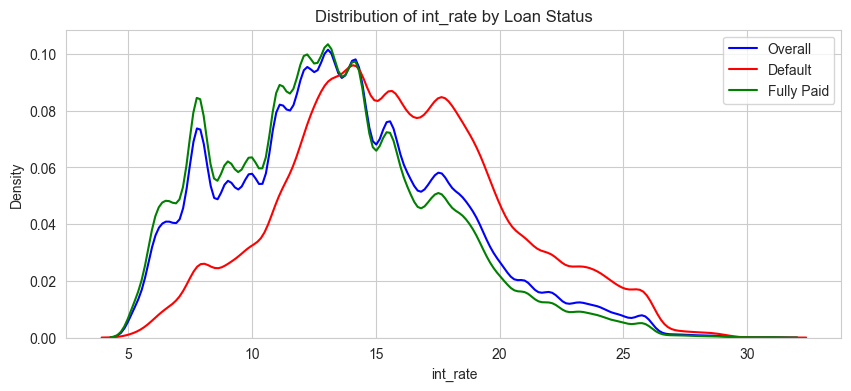

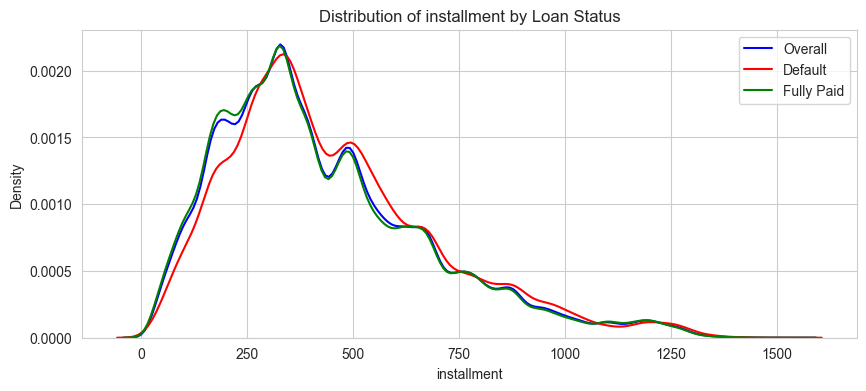

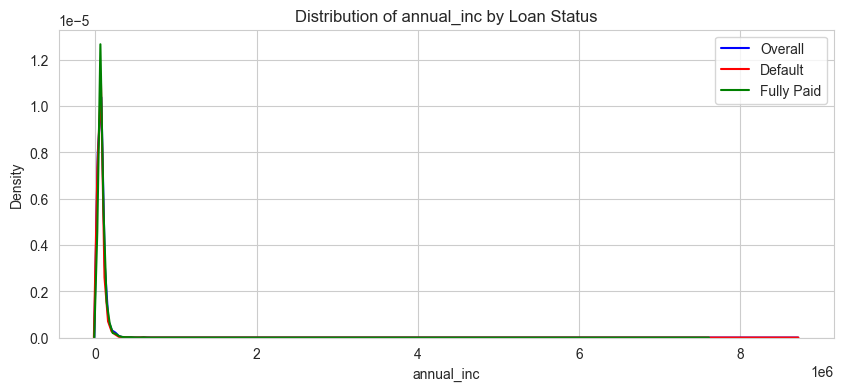

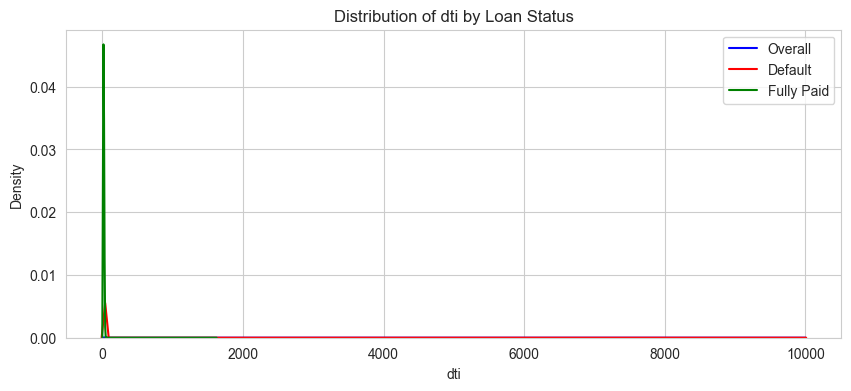

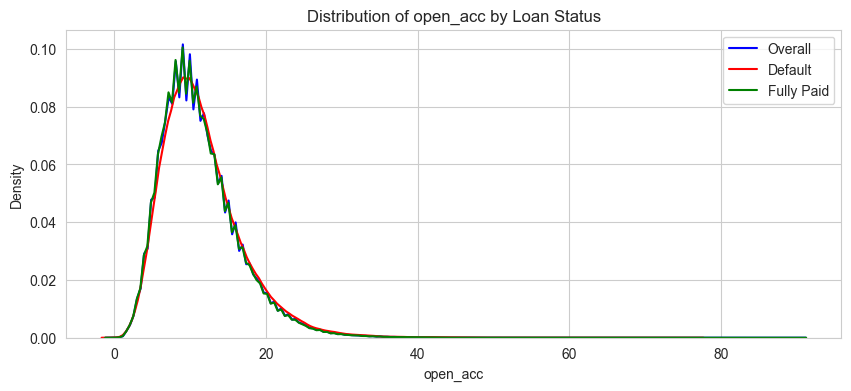

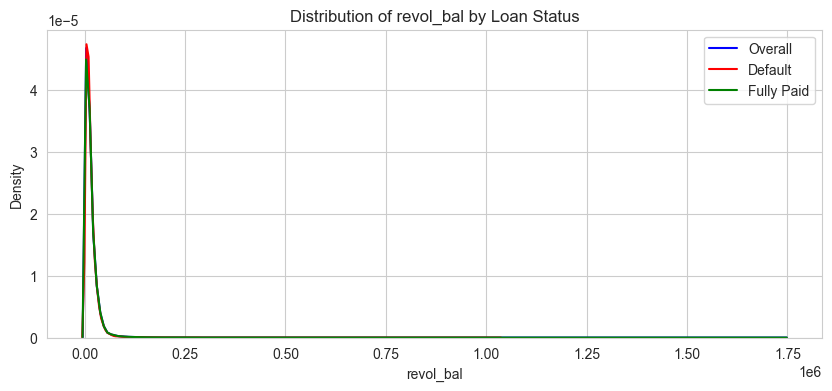

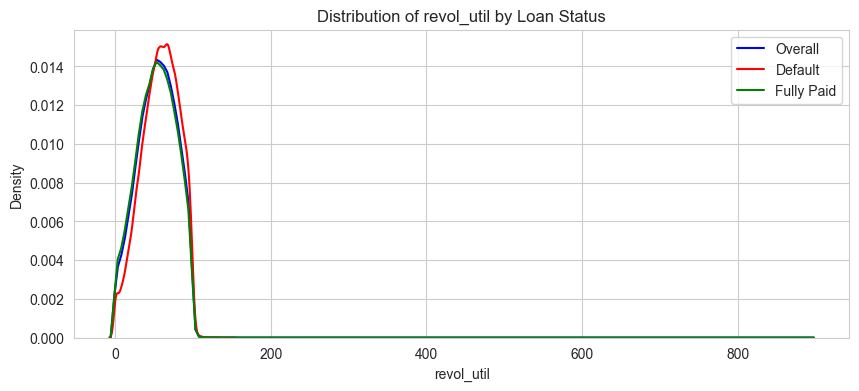

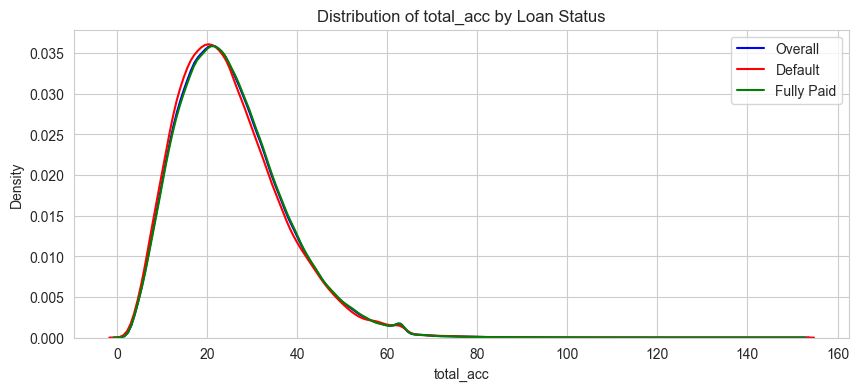

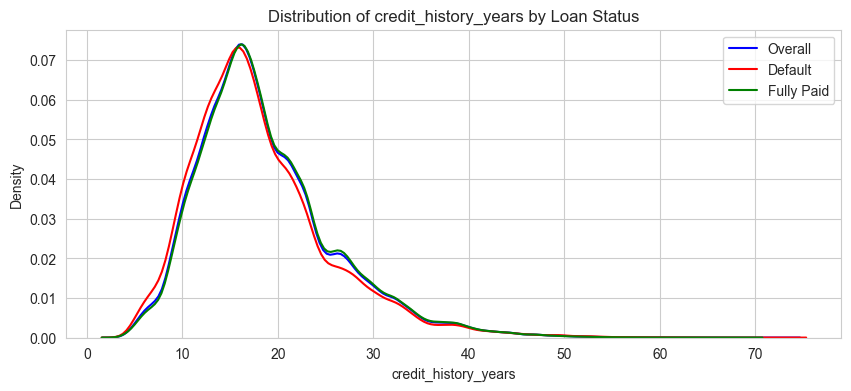

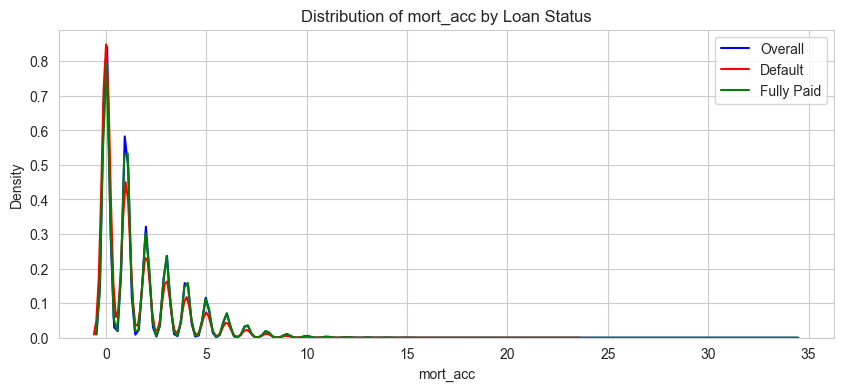

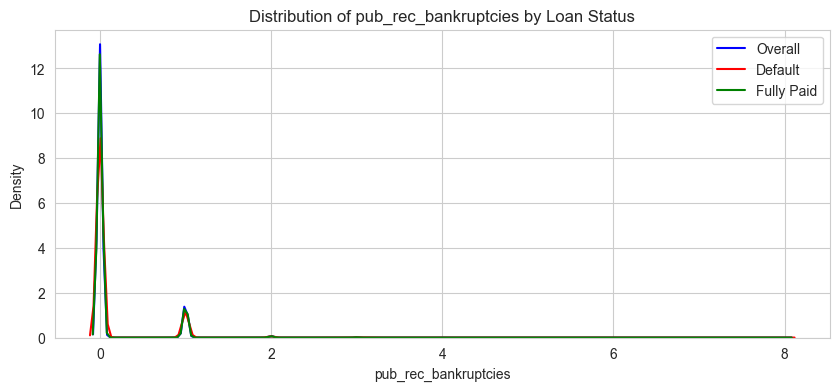

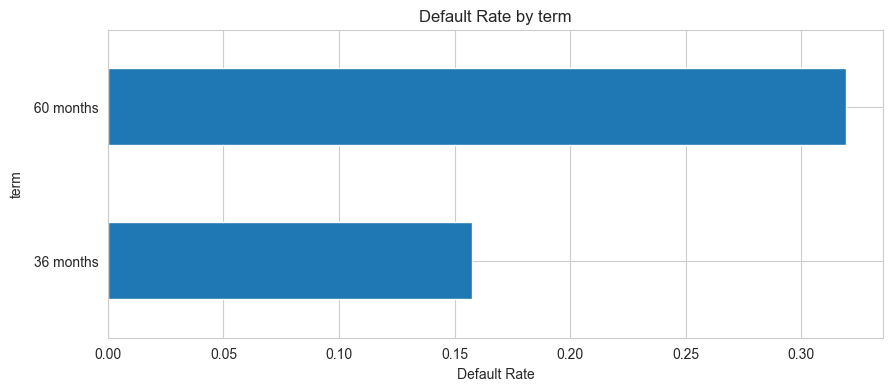

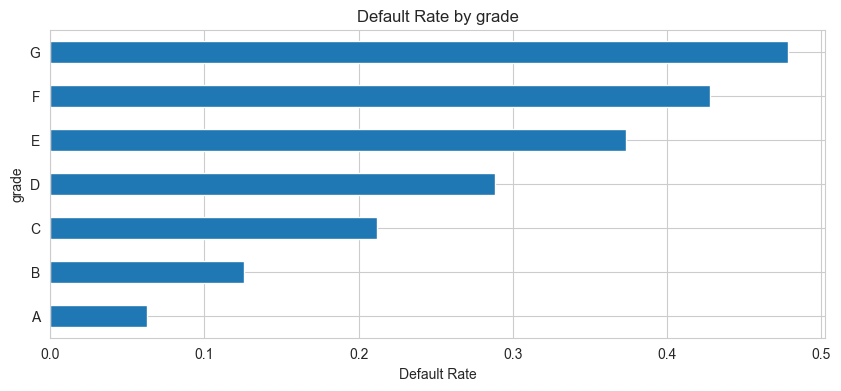

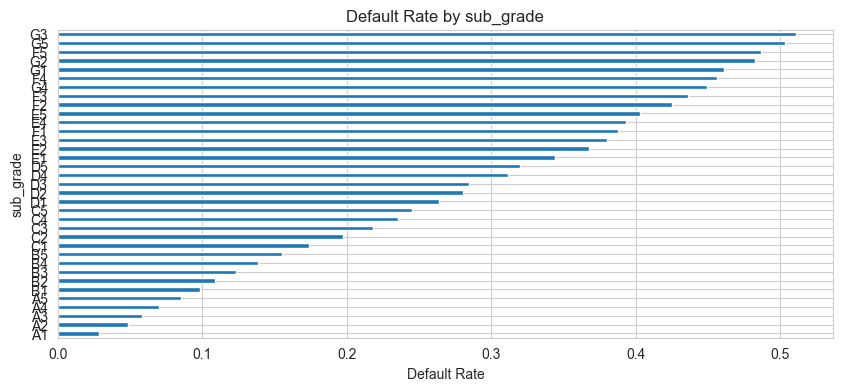

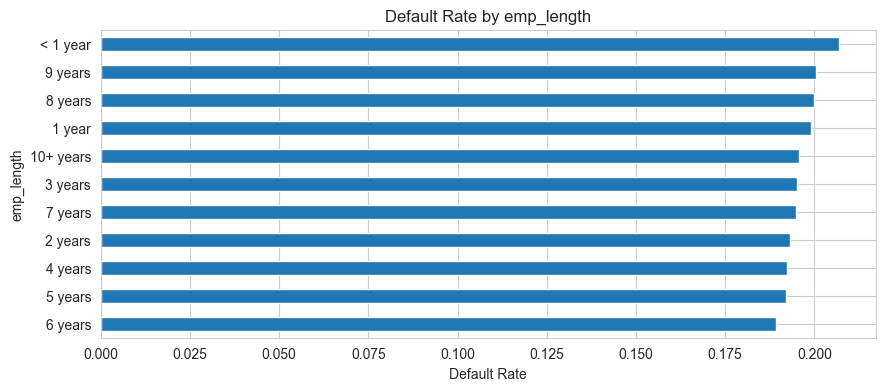

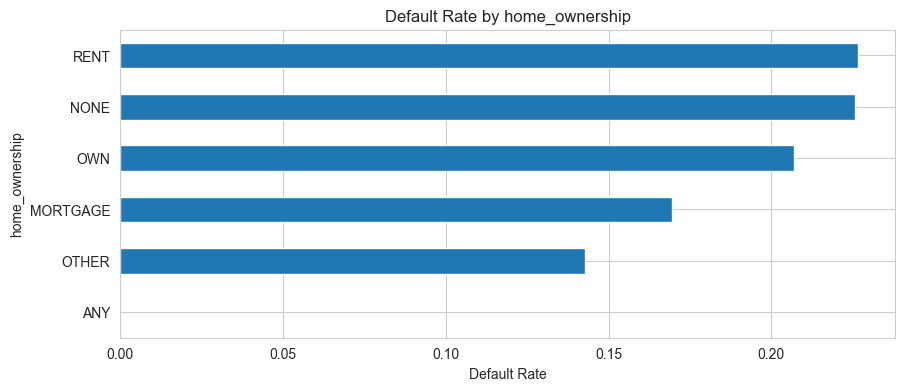

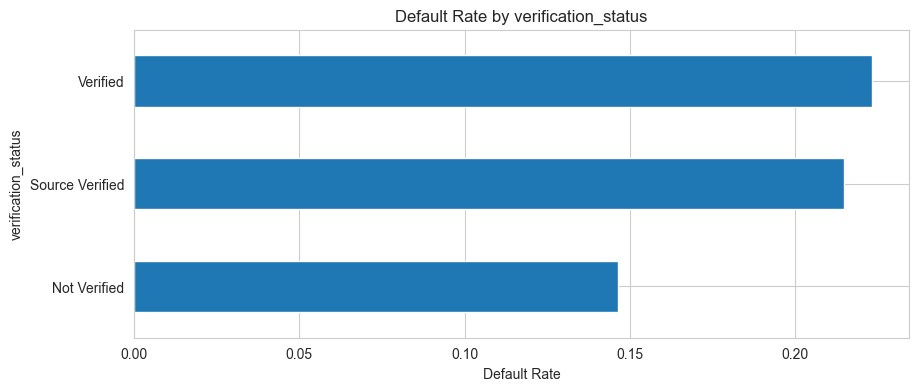

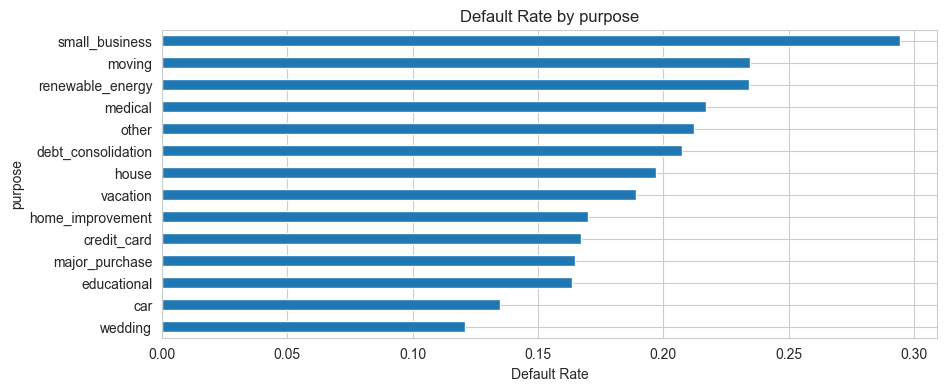

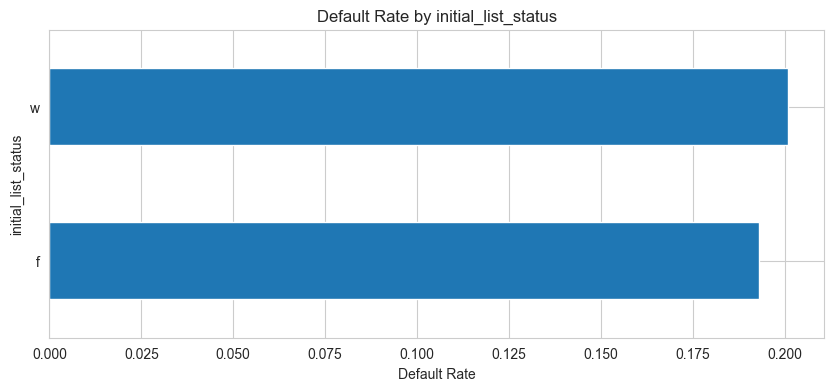

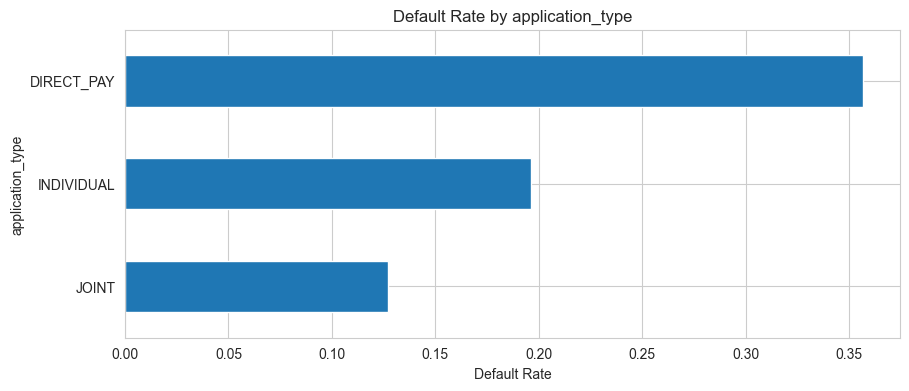

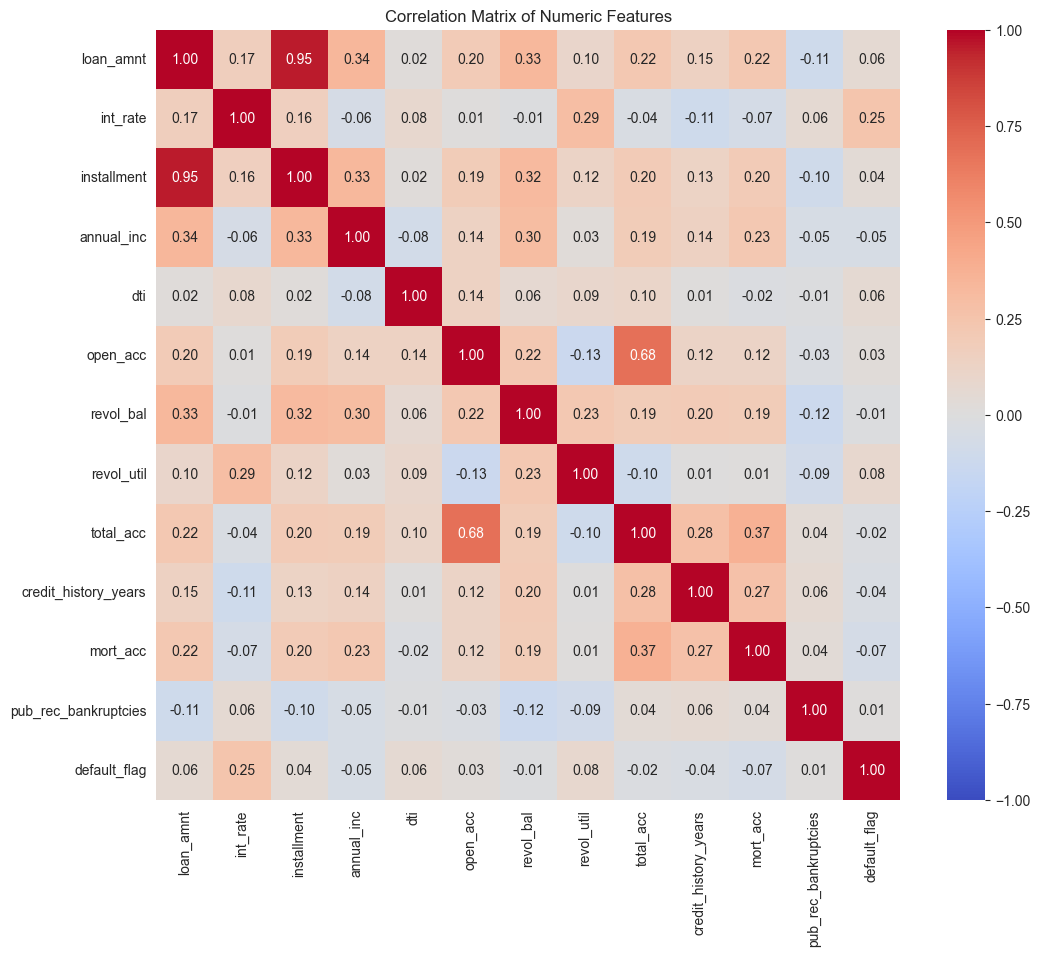

C:\Users\aadit\AppData\Local\Temp\ipykernel_28088\2368800657.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = df.groupby('loan_amt_bin')['default_flag'].mean()


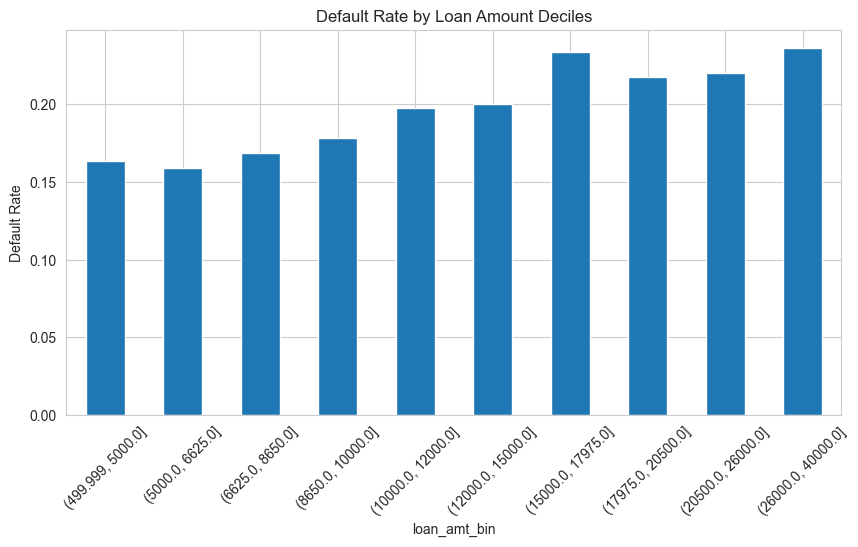

In [57]:
# Part 5 – Exploratory Data Analysis (EDA)
# =========================================

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Numeric feature distributions & default rates
num_features = ['loan_amnt','int_rate','installment','annual_inc','dti',
                'open_acc','revol_bal','revol_util','total_acc',
                'credit_history_years','mort_acc','pub_rec_bankruptcies']

for col in num_features:
    plt.figure(figsize=(10,4))
    sns.kdeplot(df[col].dropna(), label='Overall', color='blue')
    sns.kdeplot(df.loc[df['default_flag']==1, col], label='Default', color='red')
    sns.kdeplot(df.loc[df['default_flag']==0, col], label='Fully Paid', color='green')
    plt.title(f'Distribution of {col} by Loan Status')
    plt.xlabel(col); plt.legend()
    plt.show()

# 2. Categorical feature default rates
cat_features = ['term','grade','sub_grade','emp_length','home_ownership',
                'verification_status','purpose','initial_list_status','application_type']

for col in cat_features:
    pivot = df.groupby(col)['default_flag'].mean().sort_values()
    plt.figure(figsize=(10,4))
    pivot.plot(kind='barh')
    plt.title(f'Default Rate by {col}')
    plt.xlabel('Default Rate')
    plt.show()

# 3. Correlation matrix of numeric features + default_flag
plt.figure(figsize=(12,10))
corr = df[num_features + ['default_flag']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# 4. Relationship of loan amount vs default probability via bins
df['loan_amt_bin'] = pd.qcut(df['loan_amnt'], q=10)
binned = df.groupby('loan_amt_bin')['default_flag'].mean()
plt.figure(figsize=(10,5))
binned.plot(kind='bar')
plt.title('Default Rate by Loan Amount Deciles')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()
